<a href="https://colab.research.google.com/github/nupuriyer/object_identification/blob/main/Object_Identification_the_Candy_Counter_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Installations
!pip install -q datasets transformers evaluate timm albumentations
!pip install accelerate -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.2/486.2 kB 30.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 99.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.4/81.4 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 66.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 27.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.5/268.5 kB 33.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 80.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 72.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.6/227.6 kB 17.5 MB/s eta 0:00:00


In [ ]:
import json
import random

In [ ]:
work_dir = '/content/'
with open(work_dir+'result.json') as f:
    cocodata = json.load(f)

In [ ]:
cocodata['categories']

[{'id': 0, 'name': 'Black_star'},
 {'id': 1, 'name': 'Cat'},
 {'id': 2, 'name': 'Grey_star'},
 {'id': 3, 'name': 'Insect'},
 {'id': 4, 'name': 'Moon'},
 {'id': 5, 'name': 'Owl'},
 {'id': 6, 'name': 'Unicorn_head'},
 {'id': 7, 'name': 'Unicorn_whole'}]

In [ ]:
cocodata.keys()

dict_keys(['images', 'categories', 'annotations', 'info'])

In [ ]:
cocodata_test = {}
images_test = []
ann_test = []
for i in cocodata['images']:
  if(i['file_name'] in ['images\\cf539f2d-cd_24.jpg','images\\cf6ecca6-cd_10.jpg']):
    images_test.append(i)
print(len(images_test))

for j in cocodata['annotations']:
  if(j['image_id'] in [4, 7]):
    ann_test.append(j)

cocodata_test['images'] = images_test
cocodata_test['categories'] = cocodata['categories']
cocodata_test['annotations'] = ann_test
cocodata_test['info'] = cocodata['info']

cocodata_test.keys()

2


dict_keys(['images', 'categories', 'annotations', 'info'])

In [ ]:
cocodata_train = {}
images_train = []
ann_train = []
for i in cocodata['images']:
  if(i['file_name'] in ['images\\3b3dd24b-cd_23.jpg','images\\7e06d57b-cd_34.jpg', 'images\\63c9c0e4-cd_35.jpg', 'images\\91bb9798-cd_08.jpg', 'images\\99d30e7d-cd_04.jpg', 'images\\923c871e-cd_07.jpg', 'images\\279557c8-cd_22,jpg', 'images\\b98899ff-cd_09.jpg', 'images\\cab1cd5b-cd_32.jpg', 'images\\279557c8-cd_22.jpg']):
    images_train.append(i)
print(len(images_train))

for j in cocodata['annotations']:
  if(j['image_id'] in [0, 1, 2, 3, 5, 6, 8, 9, 10]):
    ann_train.append(j)

cocodata_train['images'] = images_train
cocodata_train['categories'] = cocodata['categories']
cocodata_train['annotations'] = ann_train
cocodata_train['info'] = cocodata['info']

cocodata_train.keys()

9


dict_keys(['images', 'categories', 'annotations', 'info'])

In [ ]:
# Store Huggingface formated data in a list
huggingdata_train = []
# Iterate through the images
for image in cocodata_train['images']:
    # Remove the image directory from the file name
    image['file_name'] = image['file_name'].split('\\')[-1]
    image['image_id'] = image['id']
    # Extend the image dict with bounding boxes and class labels
    image['objects'] = {'bbox': [], 'category': [], 'area': [], 'id': []}
    # Iterate through the annotations (bounding boxes and labels)
    for annot in cocodata_train['annotations']:
        # Check if the annotation matches the image
        if annot['image_id'] == image['id']:
            # Add the annotation
            image['objects']['bbox'].append(annot['bbox'])
            image['objects']['category'].append(annot['category_id'])
            image['objects']['area'].append(annot['area'])
            image['objects']['id'].append(annot['id'])
    # Append the image dict with annotations to the list
    huggingdata_train.append(image)

In [ ]:
cocodata_train

{'images': [{'width': 300,
   'height': 225,
   'id': 0,
   'file_name': '99d30e7d-cd_04.jpg',
   'image_id': 0,
   'objects': {'bbox': [[195.17045454545453,
      127.41477272727272,
      31.96022727272728,
      30.255681818181827],
     [100.14204545454545,
      163.63636363636365,
      28.55113636363636,
      34.51704545454546],
     [178.97727272727272,
      162.7840909090909,
      28.977272727272762,
      43.46590909090908],
     [204.54545454545453,
      94.60227272727273,
      32.38636363636368,
      34.94318181818182],
     [113.80034731467791, 85.8863108112061, 23.4375, 21.732954545454554],
     [146.63478553844678,
      81.093329062942,
      24.289772727272737,
      23.86363636363637],
     [208.35316732223473,
      67.03739796299834,
      24.294829659984998,
      24.05428679206437],
     [237.6993972085532,
      161.40426437475182,
      30.789487093842354,
      30.548944225921737],
     [160.9231786389105,
      113.53623365854375,
      24.53537252790561

In [ ]:
len(cocodata_train['info'])

6

In [ ]:
# Store Huggingface formated data in a list
huggingdata_test = []
# Iterate through the images
for image in cocodata_test['images']:
    # Remove the image directory from the file name
    image['file_name'] = image['file_name'].split('\\')[-1]
    image['image_id'] = image['id']
    # Extend the image dict with bounding boxes and class labels
    image['objects'] = {'bbox': [], 'category': [], 'area': [], 'id': []}
    # Iterate through the annotations (bounding boxes and labels)
    for annot in cocodata_test['annotations']:
        # Check if the annotation matches the image
        if annot['image_id'] == image['id']:
            # Add the annotation
            image['objects']['bbox'].append(annot['bbox'])
            image['objects']['category'].append(annot['category_id'])
            image['objects']['area'].append(annot['area'])
            image['objects']['id'].append(annot['id'])
    # Append the image dict with annotations to the list
    huggingdata_test.append(image)

In [ ]:
huggingdata_train

[{'width': 300,
  'height': 225,
  'id': 0,
  'file_name': '99d30e7d-cd_04.jpg',
  'image_id': 0,
  'objects': {'bbox': [[195.17045454545453,
     127.41477272727272,
     31.96022727272728,
     30.255681818181827],
    [100.14204545454545,
     163.63636363636365,
     28.55113636363636,
     34.51704545454546],
    [178.97727272727272,
     162.7840909090909,
     28.977272727272762,
     43.46590909090908],
    [204.54545454545453,
     94.60227272727273,
     32.38636363636368,
     34.94318181818182],
    [113.80034731467791, 85.8863108112061, 23.4375, 21.732954545454554],
    [146.63478553844678,
     81.093329062942,
     24.289772727272737,
     23.86363636363637],
    [208.35316732223473,
     67.03739796299834,
     24.294829659984998,
     24.05428679206437],
    [237.6993972085532,
     161.40426437475182,
     30.789487093842354,
     30.548944225921737],
    [160.9231786389105,
     113.53623365854375,
     24.535372527905615,
     25.25700113166757],
    [98.38203297954

In [ ]:
with open(work_dir+"train/"+ "metadata.jsonl", 'w') as f:
    for item in huggingdata_train:
        f.write(json.dumps(item) + "\n")

with open(work_dir+"test/"+ "metadata.jsonl", 'w') as f:
    for item in huggingdata_test:
        f.write(json.dumps(item) + "\n")

In [ ]:
from datasets import load_dataset
candy_data = load_dataset("imagefolder", data_dir="/content", split="train")
candy_data_test = load_dataset("imagefolder", data_dir="/content", split="test")

Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Dataset imagefolder downloaded and prepared to /root/.cache/huggingface/datasets/imagefolder/default-79a7d307ca393683/0.0.0/37fbb85cc714a338bea574ac6c7d0b5be5aff46c1862c1989b20e0771199e93f. Subsequent calls will reuse this data.


In [ ]:
candy_data

Dataset({
    features: ['image', 'width', 'height', 'id', 'image_id', 'objects'],
    num_rows: 9
})

In [ ]:
candy_data_test

Dataset({
    features: ['image', 'width', 'height', 'id', 'image_id', 'objects'],
    num_rows: 2
})

In [ ]:
from datasets import load_dataset

cppe5 = load_dataset("cppe-5")
cppe5
# DatasetDict({
#     train: Dataset({
#         features: ['image_id', 'image', 'width', 'height', 'objects'],
#         num_rows: 1000
#     })
#     test: Dataset({
#         features: ['image_id', 'image', 'width', 'height', 'objects'],
#         num_rows: 29
#     })
# })

Generating train split:   0%|          | 0/1000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/29 [00:00<?, ? examples/s]

Dataset cppe-5 downloaded and prepared to /root/.cache/huggingface/datasets/cppe-5/default/1.0.0/dd60c7c8210a67663b06108fb9e23c70acb98e2d3a4f3636f429509b19b74989. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['image_id', 'image', 'width', 'height', 'objects'],
        num_rows: 1000
    })
    test: Dataset({
        features: ['image_id', 'image', 'width', 'height', 'objects'],
        num_rows: 29
    })
})

In [ ]:
print(type(cppe5['train']) == type(candy_data))
print(type(cppe5['train']) == type(candy_data_test))

True
True


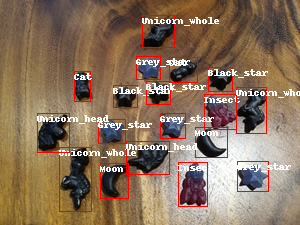

In [ ]:
import numpy as np
import os
from PIL import Image, ImageDraw

image = candy_data[6]["image"]
annotations = candy_data[6]["objects"]
draw = ImageDraw.Draw(image)

# categories = candy_data.features["objects"].feature["category"].names

id2label = {item['id']: item['name'] for item in cocodata['categories']}
label2id = {v: k for k, v in id2label.items()}

for i in range(len(annotations["id"])):
    box = annotations["bbox"][i - 1]
    class_idx = annotations["category"][i - 1]
    x, y, w, h = tuple(box)
    draw.rectangle((x, y, x + w, y + h), outline="red", width=1)
    draw.text((x, y), id2label[class_idx], fill="white")

image

In [ ]:
from transformers import AutoImageProcessor

checkpoint = "facebook/detr-resnet-50"
image_processor = AutoImageProcessor.from_pretrained(checkpoint)

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.


In [ ]:
import albumentations
import numpy as np
import torch

transform = albumentations.Compose(
    [
        albumentations.Resize(480, 480),
        albumentations.HorizontalFlip(p=1.0),
        albumentations.RandomBrightnessContrast(p=1.0),
    ],
    bbox_params=albumentations.BboxParams(format="coco", label_fields=["category"]),
)

In [ ]:
def formatted_anns(image_id, category, area, bbox):
    annotations = []
    for i in range(0, len(category)):
        new_ann = {
            "id": id,
            "category_id": category[i],
            "isCrowd": 0,
            "area": area[i],
            "bbox": list(bbox[i]),
        }
        annotations.append(new_ann)

    return annotations

In [ ]:
# transforming a batch
def transform_aug_ann(examples):
    image_ids = examples["image_id"]
    images, bboxes, area, categories = [], [], [], []
    for image, objects in zip(examples["image"], examples["objects"]):
        image = np.array(image.convert("RGB"))[:, :, ::-1]
        out = transform(image=image, bboxes=objects["bbox"], category=objects["category"])

        area.append(objects["area"])
        images.append(out["image"])
        bboxes.append(out["bboxes"])
        categories.append(out["category"])

    targets = [
        {"image_id": id_, "annotations": formatted_anns(id_, cat_, ar_, box_)}
        for id_, cat_, ar_, box_ in zip(image_ids, categories, area, bboxes)
    ]

    return image_processor(images=images, annotations=targets, return_tensors="pt")

In [ ]:
candy_data_untransformed = candy_data
candy_data = candy_data.with_transform(transform_aug_ann)
candy_data[0]

{'pixel_values': tensor([[[0.9474, 0.9474, 0.9474,  ..., 0.6563, 0.6563, 0.6563],
          [0.9474, 0.9474, 0.9474,  ..., 0.6563, 0.6563, 0.6563],
          [0.9474, 0.9474, 0.9474,  ..., 0.6563, 0.6563, 0.6563],
          ...,
          [0.4508, 0.4508, 0.4508,  ..., 0.3309, 0.3309, 0.3309],
          [0.4508, 0.4508, 0.4508,  ..., 0.3309, 0.3309, 0.3309],
          [0.4508, 0.4508, 0.4508,  ..., 0.3309, 0.3309, 0.3309]],
 
         [[1.1155, 1.1155, 1.1155,  ..., 0.8004, 0.8004, 0.8004],
          [1.1155, 1.1155, 1.1155,  ..., 0.8004, 0.8004, 0.8004],
          [1.1155, 1.1155, 1.1155,  ..., 0.8004, 0.8004, 0.8004],
          ...,
          [0.6604, 0.6604, 0.6604,  ..., 0.4853, 0.4853, 0.4853],
          [0.6604, 0.6604, 0.6604,  ..., 0.4853, 0.4853, 0.4853],
          [0.6604, 0.6604, 0.6604,  ..., 0.4853, 0.4853, 0.4853]],
 
         [[1.3328, 1.3328, 1.3328,  ..., 1.0191, 1.0191, 1.0191],
          [1.3328, 1.3328, 1.3328,  ..., 1.0191, 1.0191, 1.0191],
          [1.3328, 1.332

In [ ]:
def collate_fn(batch):
    pixel_values = [item["pixel_values"] for item in batch]
    encoding = image_processor.pad_and_create_pixel_mask(pixel_values, return_tensors="pt")
    labels = [item["labels"] for item in batch]
    batch = {}
    batch["pixel_values"] = encoding["pixel_values"]
    batch["pixel_mask"] = encoding["pixel_mask"]
    batch["labels"] = labels
    return batch

In [ ]:
from transformers import AutoModelForObjectDetection

model = AutoModelForObjectDetection.from_pretrained(
    checkpoint,
    id2label=id2label,
    label2id=label2id,
    ignore_mismatched_sizes=True,
)

Some weights of DetrForObjectDetection were not initialized from the model checkpoint at facebook/detr-resnet-50 and are newly initialized because the shapes did not match:
- class_labels_classifier.weight: found shape torch.Size([92, 256]) in the checkpoint and torch.Size([9, 256]) in the model instantiated
- class_labels_classifier.bias: found shape torch.Size([92]) in the checkpoint and torch.Size([9]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir="detr_finetuned_candy",
    per_device_train_batch_size=8,
    num_train_epochs=400,
    # fp16=True,
    save_steps=200,
    logging_steps=20,
    learning_rate=1e-5,
    weight_decay=1e-4,
    save_total_limit=2,
    remove_unused_columns=False,
)

In [ ]:
from transformers import Trainer

trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=collate_fn,
    train_dataset=candy_data,
    tokenizer=image_processor,
)

trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
This method is deprecated and will be removed in v4.27.0. Please use pad instead.


Step,Training Loss
20,2.851700
40,2.566900
60,2.374900
80,2.241800
100,2.286100
120,2.143900
140,2.065500
160,1.989500
180,1.957200
200,1.908500


TrainOutput(global_step=800, training_loss=1.404323627948761, metrics={'train_runtime': 815.1953, 'train_samples_per_second': 4.416, 'train_steps_per_second': 0.981, 'total_flos': 1.720487361024e+18, 'train_loss': 1.404323627948761, 'epoch': 400.0})

In [ ]:
trainer.save_model('candy_detector')

In [ ]:
# For offline model downloading
!zip -r /content/candy_detector.zip /content/candy_detector

  adding: content/candy_detector/ (stored 0%)
  adding: content/candy_detector/training_args.bin (deflated 49%)
  adding: content/candy_detector/config.json (deflated 59%)
  adding: content/candy_detector/pytorch_model.bin (deflated 7%)
  adding: content/candy_detector/preprocessor_config.json (deflated 47%)


In [ ]:
# Unzip model if loading from offline
# !unzip "/content/candy_detector.zip" -d "/content/candy_detector/"

In [ ]:
with open(work_dir+"coco_test.jsonl", 'w') as f:
  f.write(json.dumps(cocodata_test))

In [ ]:
import json


# format annotations the same as for training, no need for data augmentation
def val_formatted_anns(image_id, objects):
    annotations = []
    for i in range(0, len(objects["id"])):
        new_ann = {
            "id": objects["id"][i],
            "category_id": objects["category"][i],
            "iscrowd": 0,
            "image_id": image_id,
            "area": objects["area"][i],
            "bbox": objects["bbox"][i],
        }
        annotations.append(new_ann)

    return annotations


# Save images and annotations into the files torchvision.datasets.CocoDetection expects
def save_cppe5_annotation_file_images(cppe5):
    output_json = {}
    path_output_cppe5 = f"{os.getcwd()}/train/"

    if not os.path.exists(path_output_cppe5):
        os.makedirs(path_output_cppe5)

    path_anno = os.path.join(path_output_cppe5, "candy_ann.json")
    categories_json = [{"supercategory": "none", "id": id, "name": id2label[id]} for id in id2label]
    output_json["images"] = []
    output_json["annotations"] = []
    for example in cppe5:
        ann = val_formatted_anns(example["image_id"], example["objects"])
        output_json["images"].append(
            {
                "id": example["image_id"],
                "width": example["image"].width,
                "height": example["image"].height,
                "file_name": f"{example['image_id']}.png",
            }
        )
        output_json["annotations"].extend(ann)
    output_json["categories"] = categories_json

    with open(path_anno, "w") as file:
        json.dump(output_json, file, ensure_ascii=False, indent=4)

    for im, img_id in zip(cppe5["image"], cppe5["image_id"]):
        path_img = os.path.join(path_output_cppe5, f"{img_id}.png")
        im.save(path_img)

    return path_output_cppe5, path_anno

In [ ]:
import torchvision

class CocoDetection(torchvision.datasets.CocoDetection):
    def __init__(self, img_folder, feature_extractor, ann_file):
        super().__init__(img_folder, ann_file)
        self.feature_extractor = feature_extractor

    def __getitem__(self, idx):
        # read in PIL image and target in COCO format
        img, target = super(CocoDetection, self).__getitem__(idx)

        # preprocess image and target: converting target to DETR format,
        # resizing + normalization of both image and target)
        image_id = self.ids[idx]
        target = {"image_id": image_id, "annotations": target}
        encoding = self.feature_extractor(images=img, annotations=target, return_tensors="pt")
        pixel_values = encoding["pixel_values"].squeeze()  # remove batch dimension
        target = encoding["labels"][0]  # remove batch dimension

        return {"pixel_values": pixel_values, "labels": target}


im_processor = AutoImageProcessor.from_pretrained("candy_detector")

path_output_cppe5, path_anno = save_cppe5_annotation_file_images(cppe5["test"])
test_ds_coco_format = CocoDetection('/content/test/', im_processor, '/content/coco_test.jsonl')

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


In [ ]:
import evaluate
from tqdm import tqdm

model = AutoModelForObjectDetection.from_pretrained("candy_detector")
module = evaluate.load("ybelkada/cocoevaluate", coco=test_ds_coco_format.coco)
val_dataloader = torch.utils.data.DataLoader(
    test_ds_coco_format, batch_size=8, shuffle=False, num_workers=4, collate_fn=collate_fn
)

with torch.no_grad():
    for idx, batch in enumerate(tqdm(val_dataloader)):
        pixel_values = batch["pixel_values"]
        pixel_mask = batch["pixel_mask"]

        labels = [
            {k: v for k, v in t.items()} for t in batch["labels"]
        ]  # these are in DETR format, resized + normalized

        # forward pass
        outputs = model(pixel_values=pixel_values, pixel_mask=pixel_mask)

        orig_target_sizes = torch.stack([target["orig_size"] for target in labels], dim=0)
        results = im_processor.post_process(outputs, orig_target_sizes)  # convert outputs of model to COCO api

        module.add(prediction=results, reference=labels)
        del batch

results = module.compute()
print(results)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
100%|██████████| 1/1 [00:09<00:00,  9.23s/it]


Accumulating evaluation results...
DONE (t=0.03s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.444
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.543
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.543
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.335
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.540
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.328
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.510
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.510
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.361
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.651
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= l

In [ ]:
def candy_counter(image_inp):

  from transformers import pipeline
  from PIL import Image, ImageDraw
  import pandas as pd

  if type(image_inp) != list:
    image_inp = [image_inp]

  result = {}
  # image_inp = ['/content/cf6ecca6-cd_10.jpg', '/content/cf539f2d-cd_24.jpg']

  for i in range(0, len(image_inp)):
    image = Image.open(image_inp[i])

    obj_detector = pipeline("object-detection", model="candy_detector")
    result[i] = obj_detector(image, threshold=0.2)

  df_fin = pd.DataFrame()
  for i in range(0, len(result)):
    df_tr = pd.DataFrame.from_dict(result[i])
    df_tr['id'] = i

    con = [df_fin, df_tr]

    df_fin = pd.concat(con)
  for n in range(0, len(image_inp)):


    image = Image.open(image_inp[n])
    # print(image)
    draw = ImageDraw.Draw(image)

    # for n in result:
    df_br = df_fin[df_fin['id'] == n]

    for score, label, box in zip(df_br["score"], df_br["label"], df_br["box"]):
      box = [round(i, 2) for i in box.values()]
      x, y, x2, y2 = tuple(box)
      draw.rectangle((x, y, x2, y2), outline="red", width=1)
      draw.text((x, y), label, fill="white")
    image.show()


  for i in df_fin['id'].unique():
    print(i)
    dict_fin = {}
    for j in df_fin[df_fin['id'] == i]['label'].unique():
      dict_fin[j] = df_fin[(df_fin['id'] == i) & (df_fin['label'] == j)]['label'].count()
    print(dict_fin)

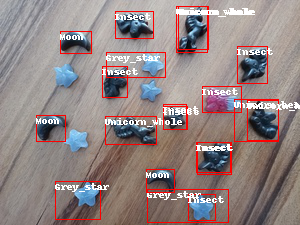

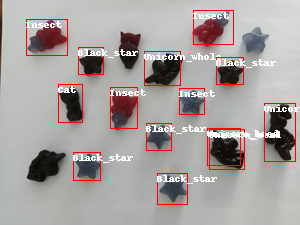

0
{'Grey_star': 3, 'Insect': 9, 'Unicorn_whole': 3, 'Unicorn_head': 2, 'Moon': 3}
1
{'Insect': 4, 'Unicorn_head': 2, 'Unicorn_whole': 2, 'Black_star': 5, 'Cat': 1}


In [ ]:
candy_counter(['/content/test/cf6ecca6-cd_10.jpg', '/content/test/cf539f2d-cd_24.jpg'])